# Cluster Analysis of Life-Cycle Savings Data

This project aims to uncover hidden trends and patterns within life cycle savings data by leveraging machine learning algorithms. To attain this objective, we are following the Cross Industry Standard Process for Data Mining (CRISP-DM) framework, which consists of six key phases:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

In this project, our primary focus is on the initial five phases of the CRISP-DM framework, specifically highlighting the importance of data interpretation.

**Data:**<br>
The data is an aggregation of economic data about life cycle savings for 50 countries between 1960 and 1970, including the following variables:
* `sr` - Savings Ratio
* `pop15` - Percentage of Population Under 15
* `pop75` - Percentage of Population Over 75
* `dpi` - Disposable Personal Income
* `ddpi` - Growth Rate of Disposable Personal Income

**Reference:**<br>
* [CRISP-DM Help Overview](https://www.ibm.com/docs/en/spss-modeler/18.1.1?topic=dm-crisp-help-overview)
* [LifeCycleSavings: Intercountry Life-Cycle Savings Data](https://rdrr.io/r/datasets/LifeCycleSavings.html)
* [What Is the Life-Cycle Hypothesis in Economics?](https://www.investopedia.com/terms/l/life-cycle-hypothesis.asp)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LifeCycleSavingsData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  50 non-null     object 
 1   sr       50 non-null     float64
 2   pop15    50 non-null     float64
 3   pop75    50 non-null     float64
 4   dpi      50 non-null     float64
 5   ddpi     50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [4]:
df.head()

,country,sr,pop15,pop75,dpi,ddpi
0,Australia,11.43,29.35,2.87,2329.68,2.87
1,Austria,12.07,23.32,4.41,1507.99,3.93
2,Belgium,13.17,23.80,4.43,2108.47,3.82
3,Bolivia,5.75,41.89,1.67,189.13,0.22
4,Brazil,12.88,42.19,0.83,728.47,4.56


# 1. Business Understanding

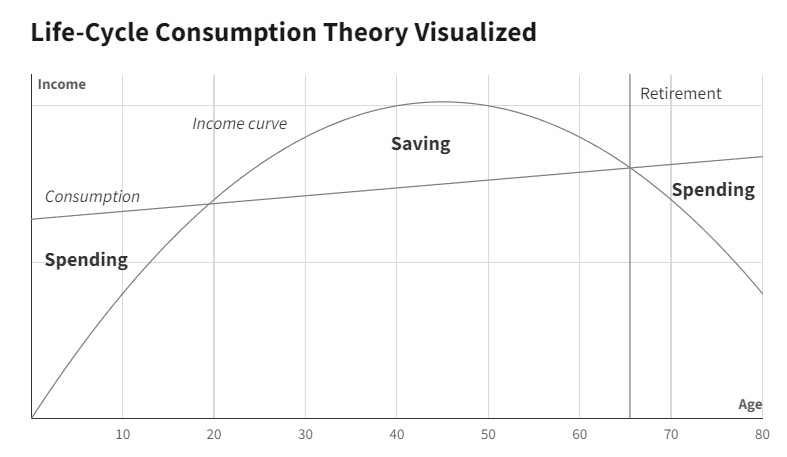

From my understanding, **the life cycle consumption theory** is composed of two components: **the income curve** and **consumption**.

First, **the income curve** refers to the idea that a person's income varies throughout their life. For instance, in the early stage, when a person is young, their income tends to be low due to less experience. In the middle stage, as the person gets older, their income tends to be higher due to more experience. Finally, in the later stage, when the person is old, their income tends to be lower due to retirement.

On the other hand, concerning **consumption**, individuals aim to maintain a relatively constant level of spending despite their varying income levels. They achieve this by borrowing money in the early stage to accommodate the lower income, saving money during the middle stage, and spending money during the later stage.

In short, **the life cycle consumption theory** explains how a person adjusts their borrowing, saving, and spending patterns in response to different income levels throughout their lives.

In this project, our aim is to verify this theory by leveraging machine learning algorithms to uncover hidden trends and patterns within the data, enabling data-driven decisions to support the theory with fact.

# 2. Data Understanding & 3. Data Preparation

## Exploratory Data Analysis

To begin, let's conduct an exploratory data analysis to understand the data's properties. This analysis will inform our data cleaning, data wrangling, and modeling strategies, which can include visualizing the data and examining its statistics.

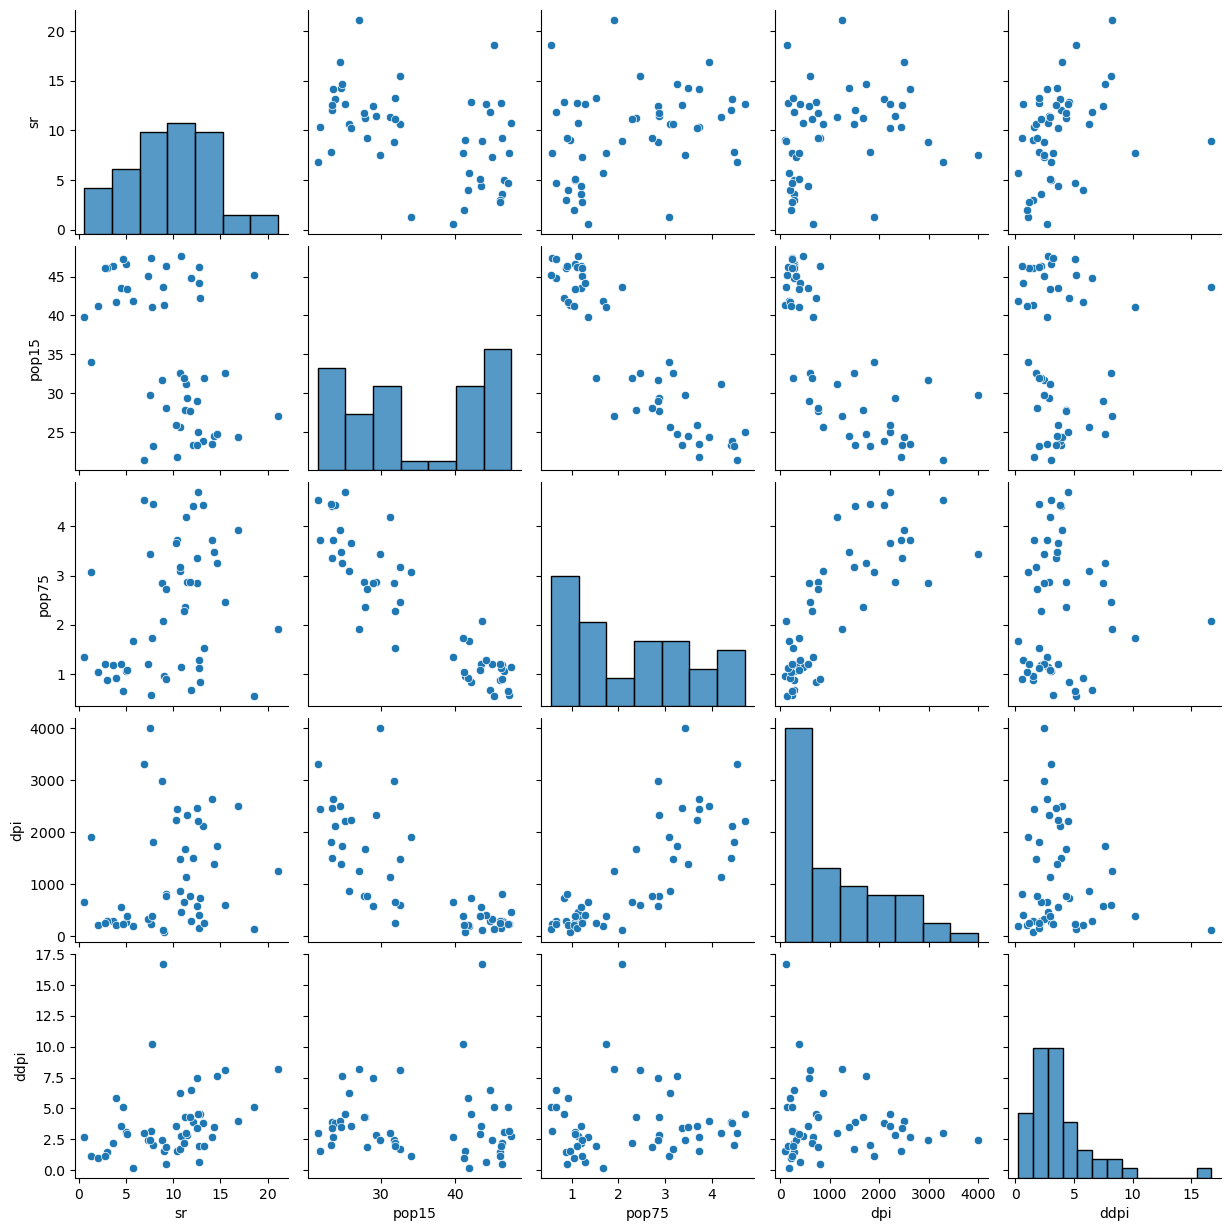

In [5]:
sns.pairplot(df.iloc[:, 1:])
plt.show()

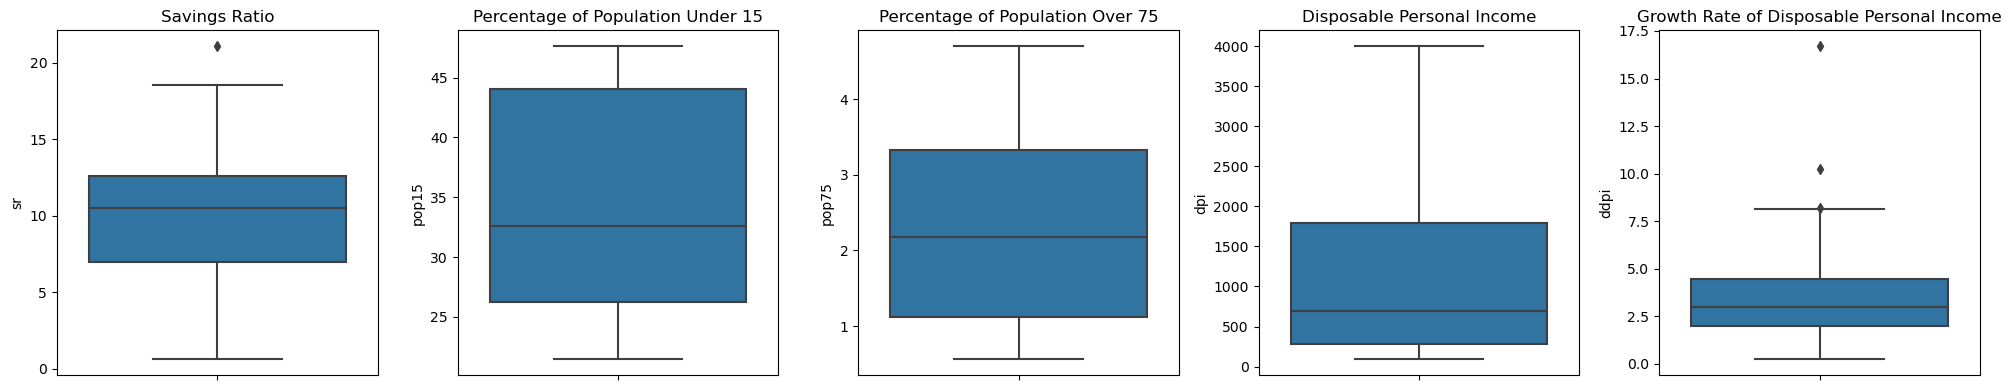

In [6]:
# Create a figure with 1 row and 5 columns of subplots, each with a specific size
fig, axes = plt.subplots(1, 5, figsize = (20, 4))

# Plot a boxplot for 'sr' (Savings Ratio) in the first subplot
sns.boxplot(data = df, y = 'sr', ax = axes[0])
axes[0].set_title('Savings Ratio')

# Plot a boxplot for 'pop15' (Percentage of Population Under 15) in the second subplot
sns.boxplot(data = df, y = 'pop15', ax = axes[1])
axes[1].set_title('Percentage of Population Under 15')

# Plot a boxplot for 'pop75' (Percentage of Population Over 75) in the third subplot
sns.boxplot(data = df, y = 'pop75', ax = axes[2])
axes[2].set_title('Percentage of Population Over 75')

# Plot a boxplot for 'dpi' (Disposable Personal Income) in the fourth subplot
sns.boxplot(data = df, y = 'dpi', ax = axes[3])
axes[3].set_title('Disposable Personal Income')

# Plot a boxplot for 'ddpi' (Growth Rate of Disposable Personal Income) in the fifth subplot
sns.boxplot(data = df, y = 'ddpi', ax = axes[4])
axes[4].set_title('Growth Rate of Disposable Personal Income')

# Adjust the layout of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

Visualizing the data through pairplots reveals the presence of clusters, such as those between variables like `sr` and `pop15`, `pop15` and `pop75`, `pop15` and `dpi`, and `pop15` and `ddpi`. This observation suggests the potential use of clustering algorithms.

## Descriptive Statistics

In [7]:
descriptive_statistics = round(df.describe(), 2)
descriptive_statistics.loc['range'] = descriptive_statistics.loc['max'] - descriptive_statistics.loc['min']

In [8]:
descriptive_statistics

,sr,pop15,pop75,dpi,ddpi
count,50.00,50.00,50.00,50.00,50.00
mean,9.67,35.09,2.29,1106.76,3.76
std,4.48,9.15,1.29,990.87,2.87
min,0.60,21.44,0.56,88.94,0.22
25%,6.97,26.22,1.12,288.21,2.00
50%,10.51,32.58,2.17,695.66,3.00
75%,12.62,44.06,3.32,1795.62,4.48
max,21.10,47.64,4.70,4001.89,16.71
range,20.50,26.20,4.14,3912.95,16.49


Since clustering algorithms depend on distance measures, it's essential to consider the impact of varying scales. Therefore, normalization techniques may be required. The statistics table shows that certain variables have extreme ranges, with pop75 having a range of 4.14, pop15 26.20, and dpi 3912.95.

# 4. Modeling and 5. Evaluation

## Cluster Analysis Using K-Means Clustering

Cluster analysis is a data analysis technique used to uncover hidden groups in data, which could occur naturally. This technique is often employed for customer segmentation, document classification, image compression, and more. In this project, we use K-Means clustering, a popular clustering algorithm, to uncover hidden groups in life cycle savings data.

K-Means clustering works by initially assigning a specified number of centroids to the data randomly. It assigns all data points to their closest centroids to form clusters, then re-calculates and re-assigns the centroids iteratively until a certain number of iterations is reached or until the algorithm stabilizes.

In this project, we start by determining the optimal number of clusters using the elbow method to identify the point of diminishing returns in inertia, which measures how well the clusters are formed (data points within a cluster are close, and clusters are well-separated from each other). We then use this optimal number for K-Means clustering. Since clustering techniques are sensitive to data scaling, we also apply min-max normalization to address this issue.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


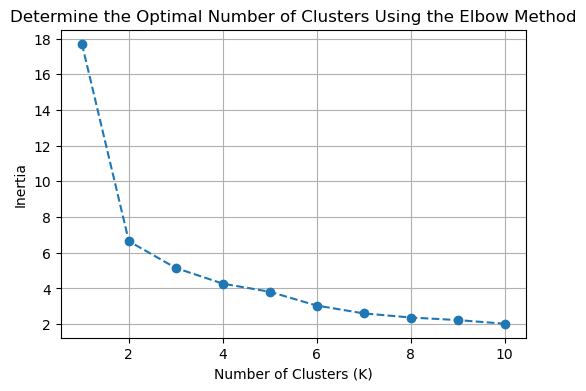

In [9]:
# Import the necessary libraries from scikit-learn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Define a list of potential cluster numbers (K values) from 1 to 10
K = [i for i in range(1, 10 + 1)]

# Create an empty list to store the inertia values for each K
inertia = []

# Iterate over each K value to determine the inertia
for k in K:
    # Create a Min-Max scaler to scale the data
    scaler = MinMaxScaler()
    
    # Apply Min-Max scaling to the data, excluding the first column
    df_scaled = scaler.fit_transform(df.iloc[:, 1:])
    
    # Create a KMeans clustering model with the current K value and set a random seed for reproducibility
    kmeans = KMeans(n_clusters = k, random_state = 0)
    
    # Fit the KMeans model to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the inertia (within-cluster sum of squares) to the inertia list
    inertia = inertia + [kmeans.inertia_]
    
# Plot the results
plt.figure(figsize = (6, 4))
plt.plot(K, inertia, marker = 'o', linestyle = '--')
plt.title('Determine the Optimal Number of Clusters Using the Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [10]:
# Create a Min-Max scaler to scale the data
scaler = MinMaxScaler()

# Apply Min-Max scaling to the data, excluding the first column
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

# Create a KMeans clustering model with 2 clusters and set a random seed for reproducibility
kmeans = KMeans(2, random_state = 0)

# Fit the KMeans model to the scaled data
kmeans.fit(df_scaled)

# Assign cluster labels from the KMeans clustering results to a new column named 'cluster' in the DataFrame 'df'
df['cluster'] = kmeans.labels_

# Apply a lambda function to categorize clusters into 'Early Stage' or 'Later Stage' based on their labels
df['cluster'] = df['cluster'].apply(lambda x: 'Early Stage' if x == 0 else 'Later Stage')

In [11]:
round(df.groupby('cluster').mean(), 2)

,sr,pop15,pop75,dpi,ddpi
cluster,,,,,
Early Stage,7.66,43.79,1.12,332.50,3.65
Later Stage,11.53,27.06,3.38,1821.46,3.86


The cluster analysis reveals two distinct clusters: one characterized by a high `pop15`, lower `ddpi`, and low `sr`, `pop75`, and `dpi`, and another characterized by low `pop15`, higher `ddpi`, and high `sr`, `pop75`, and `dpi`. These clusters represent two distinct groups: a low savings ratio group and a high savings ratio group.

These clusters align with various stages of the life cycle consumption theory. The low savings ratio group reflects the early stage, characterized by a young population and low income levels, while the high savings group represents the later stage, characterized by an old population and high income levels.

### Data Visualization

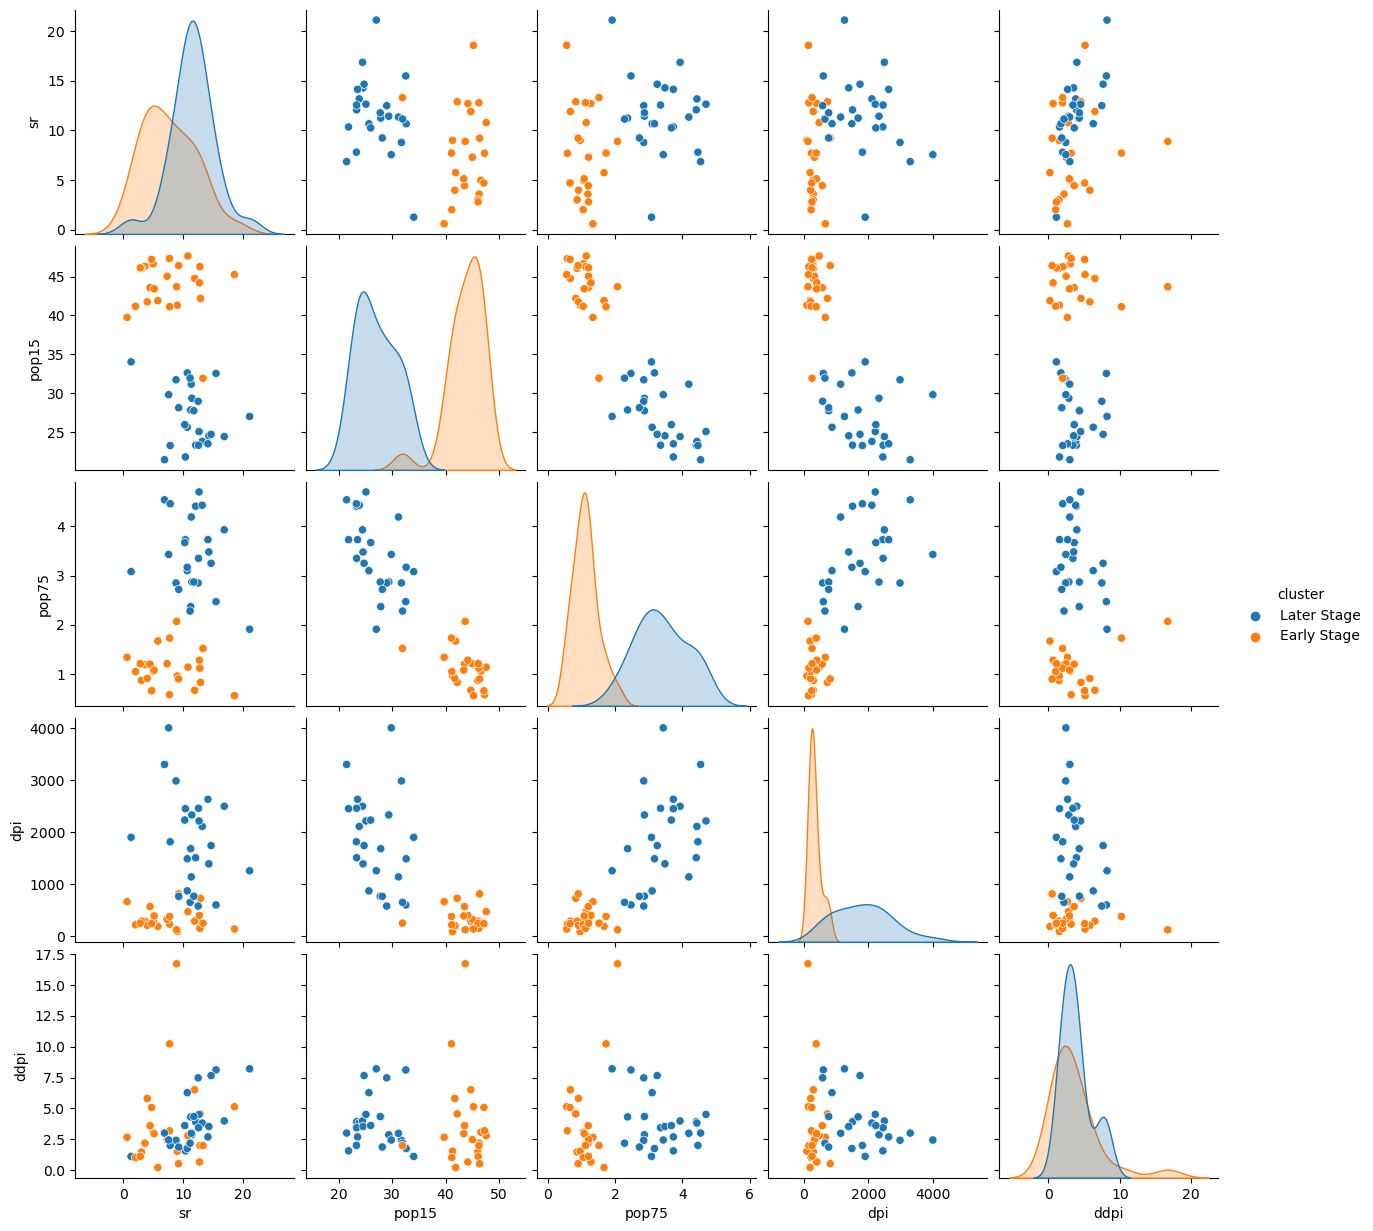

In [12]:
sns.pairplot(df.iloc[:, 1:], hue = 'cluster')
plt.show()

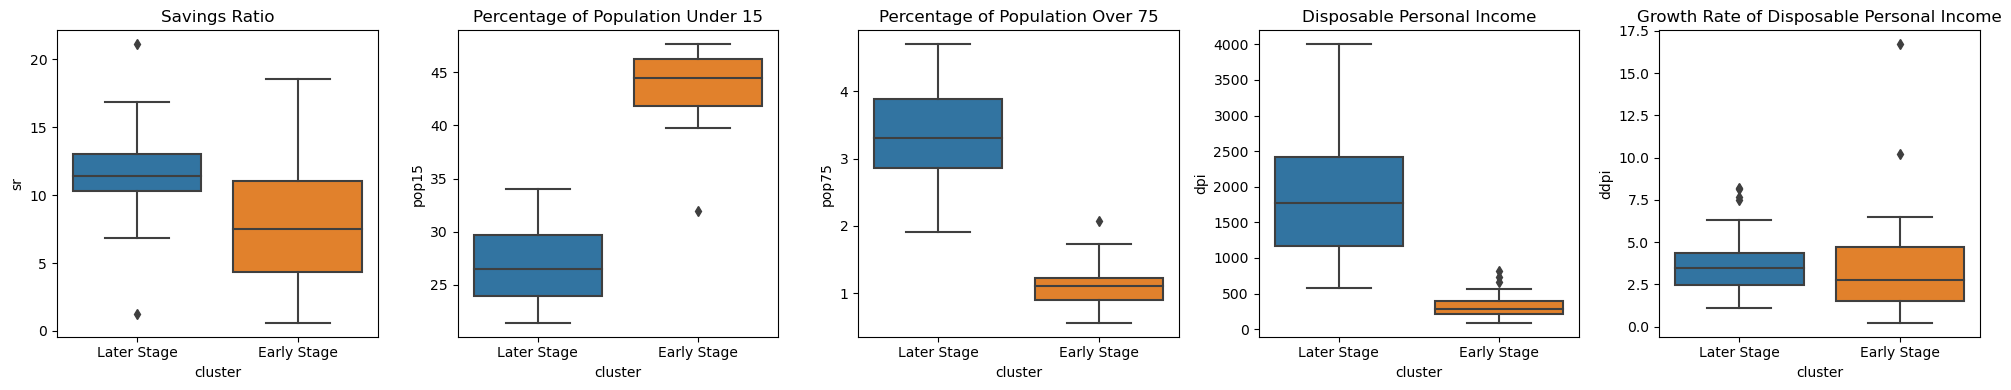

In [13]:
# Create a figure with 1 row and 5 columns of subplots, each with a specific size
fig, axes = plt.subplots(1, 5, figsize = (20, 4))

# Plot a boxplot for 'sr' (Savings Ratio) in the first subplot
sns.boxplot(data = df, x = 'cluster', y = 'sr', ax = axes[0])
axes[0].set_title('Savings Ratio')

# Plot a boxplot for 'pop15' (Percentage of Population Under 15) in the second subplot
sns.boxplot(data = df, x = 'cluster', y = 'pop15', ax = axes[1])
axes[1].set_title('Percentage of Population Under 15')

# Plot a boxplot for 'pop75' (Percentage of Population Over 75) in the third subplot
sns.boxplot(data = df, x = 'cluster', y = 'pop75', ax = axes[2])
axes[2].set_title('Percentage of Population Over 75')

# Plot a boxplot for 'dpi' (Disposable Personal Income) in the fourth subplot
sns.boxplot(data = df, x = 'cluster', y = 'dpi', ax = axes[3])
axes[3].set_title('Disposable Personal Income')

# Plot a boxplot for 'ddpi' (Growth Rate of Disposable Personal Income) in the fifth subplot
sns.boxplot(data = df, x = 'cluster', y = 'ddpi', ax = axes[4])
axes[4].set_title('Growth Rate of Disposable Personal Income')

# Adjust the layout of subplots to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

The boxplots show that half of the countries in the later stage cluster have a savings ratio between 10 and 15, while half of the countries in the early stage have a savings ratio between 5 and 10. Moreover, 50% of the countries in the later stage cluster have a percentage of young population between 25 and 30, and 50% of the countries in the early stage have a percentage of young population between 40 and 45. On the other hand, the majority of the old population percentages for the later stage are between 3 and 4, whereas for the early stage, it is around 1. Interestingly, the disposable personal income for most countries in the later stage cluster falls between 1000 and 2500, while for the early stage cluster, it is below 500 for most countries. The growth rates for both clusters are similar, with the later stage having a narrow range of growth rates and the early stage having a wider range of growth rates.

### List of Countries

In [14]:
# Import necessary libraries for country and continent data handling
import pycountry
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Define a function to get the continent of a country
def get_continent(country):
    try:
        # Convert the country name to its alpha-2 code
        country_alpha2 = country_name_to_country_alpha2(country)
        
        # Get the continent code for the given country alpha-2 code
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        
        # Map the continent code to the corresponding continent name
        continent = {'AF': 'Africa',
                     'AS': 'Asia',
                     'EU': 'Europe',
                     'NA': 'North America',
                     'OC': 'Oceania',
                     'SA': 'South America'}.get(continent_code, 'Unknown')
        
        # Return the continent name
        return continent
    
    except Exception:
        # If there's an exception (e.g., if the country is not found), return None
        return None

# Apply the 'get_continent' function to the 'country' column of the DataFrame 'df'
# and create a new 'continent' column with the continent information
df['continent'] = df['country'].apply(get_continent)

In [15]:
df.pivot_table(values = 'country', index = ['cluster', 'continent'], aggfunc = 'count')

country
cluster     continent             
Early Stage Africa               3
            Asia                 5
            North America        5
            South America        8
Later Stage Africa               1
            Asia                 1
            Europe              19
            North America        2
            Oceania              2
            South America        1

#### Early Stage of the Life Cycle Consumption Theory

In [16]:
df[df['cluster'] == 'Early Stage']['country'].to_list()

['Bolivia',
 'Brazil',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Ecuador',
 'Guatamala',
 'Honduras',
 'India',
 'Korea',
 'Nicaragua',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'South Rhodesia',
 'Turkey',
 'Tunisia',
 'Venezuela',
 'Zambia',
 'Jamaica',
 'Libya',
 'Malaysia']

#### Later Stage of the Life Cycle Consumption Theory

In [17]:
df[df['cluster'] == 'Later Stage']['country'].to_list()

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Luxembourg',
 'Malta',
 'Norway',
 'Netherlands',
 'New Zealand',
 'Portugal',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States',
 'Uruguay']

It's noteworthy that most countries in the early stage of the cycle are from South America, whereas most countries in the later stage of the cycle are from Europe, which is mostly developed.

# Conclusion

In summary, this project utilized K-Means clustering to uncover distinct groups in life cycle savings data. Two groups emerged, closely aligning with life cycle stages: a low savings group representing the early stage with a young population and lower income, and a high savings group signifying the later stage with an old population and higher income. Boxplots confirmed these trends, showing later-stage countries with savings ratios of 10-15, young populations of 25-30%, and disposable incomes of 1000-2500, while early-stage countries had ratios of 5-10, young populations of 40-45%, and incomes below 500. Regional disparities were evident, with most early-stage countries in South America and later-stage countries in Europe. This analysis offers valuable insights into savings, demographics, and economic development.